# 特征提取

## 特征脸

取人脸数据的每一行可以看做一个人脸

取人脸数据的前k个主成分组成的矩阵中的每一行也可以看做一个人脸（特征脸Eigen Face），其中第一行是最重要的特征脸

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people(data_home=".\datasets")

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
faces.data.shape

(13233, 2914)

In [6]:
faces.images.shape

(13233, 62, 47)

In [7]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [8]:
example_faces = X[:36]
example_faces.shape

(36, 2914)

In [9]:
def plot_face(faces):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks': []},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62,47), cmap='bone')
    plt.show()

### 画人脸

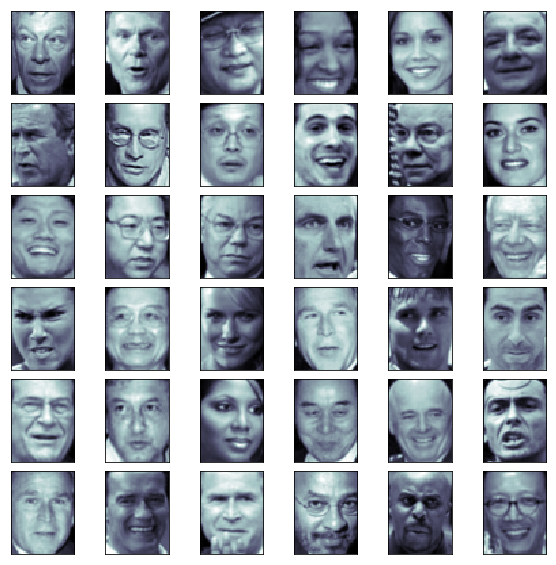

In [10]:
plot_face(example_faces)

### 特征脸

In [11]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized')
%time pca.fit(X)

Wall time: 28.4 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [12]:
pca.components_.shape

(2914, 2914)

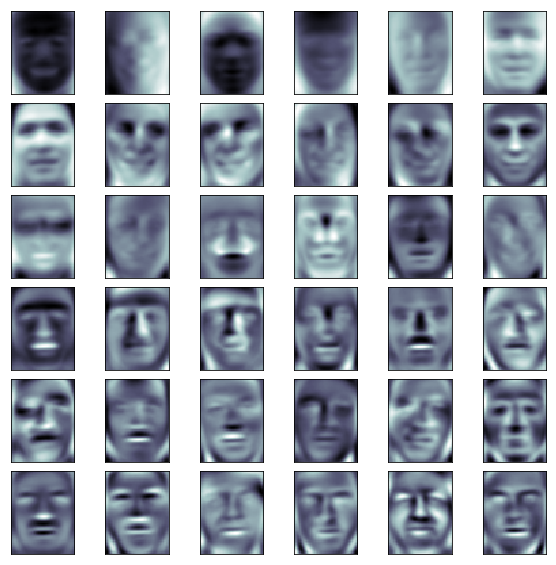

In [13]:
plot_face(pca.components_[:36])

以上就是前36主成分的特征脸